In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(10)

,area,bedrooms,price
4,1200,2,51.0
16,1180,3,48.0
3,1521,3,75.0
18,2770,3,102.0
9,3700,5,167.0
2,1440,3,62.0
14,2250,3,101.0
6,2732,4,135.0
1,2600,4,120.0
7,3300,4,155.0


In [3]:
# Now we do scaling because we have price value in float so that's we
# have convert / scale all the values into float 0 to 1

from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
w = np.ones(shape=2)

In [6]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [7]:
np.dot(w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [14]:
number_of_features = scaled_X.shape[1]
number_of_features    

2

In [19]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w -learning_rate *w_grad
        b = b -learning_rate *b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list 
    
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

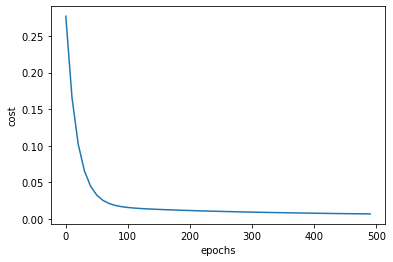

In [20]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [21]:
sx.transform([[2600,4]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [22]:
w

array([0.70712464, 0.67456527])

In [23]:
sy.inverse_transform([[1,0.5,0]])

array([[167.,  32.]])

In [25]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
    pass
    
predict(2600,4, w, b)    

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [26]:
predict(1000,2, w, b)  

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [27]:
predict(1500,3, w, b)  

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

In [28]:
import random

In [31]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i  in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b 
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*(sample_y - y_predicted)
        
        w = w -learning_rate *w_grad
        b = b -learning_rate *b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
           
    return w, b, cost, cost_list, epoch_list
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70520436, 0.67383573]), -0.22930251667581905, 0.00023501561209044683)

In [32]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

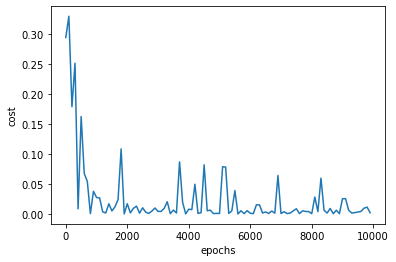

In [33]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [34]:
predict(2600,4, w_sgd, b_sgd)    

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.3612889238561

In [35]:
predict(1000,2, w_sgd, b_sgd)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.351811702069096

In [37]:
np.random.permutation(20)

array([14, 19, 15, 16,  0, 11,  1,  7,  6,  2,  9,  4, 12,  3, 17, 10,  8,
        5, 13, 18])

In [38]:
def mini_stochastic_gradient_descent(X, y_true, epochs=100, batch_size= 5, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i  in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b 

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj - y_predicted))
            b_grad = -(2/len(Xj))*(yj - y_predicted)

            w = w -learning_rate *w_grad
            b = b -learning_rate *b_grad

            cost = np.mean(np.square(yj-y_predicted))

            if i%10==0:
                cost_list.append(cost)
                epoch_list.append(i)

        return w, b, cost, cost_list, epoch_list
w_m_sgd, b_m_sgd, cost_m_sgd, cost_list_m_sgd, epoch_list_m_sgd = mini_stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),epochs = 120, batch_size = 5)
w_m_sgd, b_m_sgd, cost_m_sgd

(array([0.98238241, 0.97823559]),
 array([-0.00822472, -0.00731656, -0.00588813, -0.00740704, -0.0088339 ]),
 0.2600301899794895)

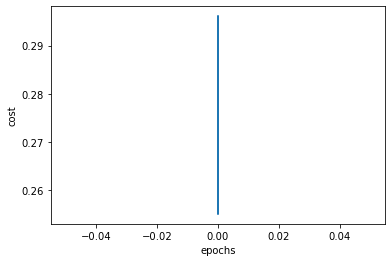

In [39]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_m_sgd, cost_list_m_sgd)

In [42]:
def predict(area,bedrooms,w_m_sgd,b_m_sgd):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w_m_sgd,b_m_sgd)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [ ]:
predict(1000,2,w,b)